### VISUALIZACIÓN AVANZADA

En el presente trabajo se analizarán los datos de COVID-19 que se obtienen a partir de la declaración de los casos a la Red Nacional de Vigilancia Epidemiológica (RENAVE) a través de la plataforma informática vía Web SiViES (Sistema de Vigilancia de España) que gestiona el Centro Nacional de Epidemiología (CNE). Estos datos corresponden al periodo comprendido entre el inicio de la pandemia (enero-2020) hasta el 28 de marzo de 2022.

Para realizar algunos cálculos más específicos utilizaremos datos del INE, específicamente de población por provincia y franja etaria de los tres años de pandemia "oficial" (con seguimiento diario: 2020, 2021 y 2022) y los datos de polígonos que correspoden a las representaciones gráficas de las provincias de España.

**Para empezar, importamos las librerías que utilizaremos para este análisis.**

In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from datetime import date
from datetime import datetime

##### Lectura de datasets

Realizamos la lectura de los datasets de Covid y provincias (previamente descargados) y realizamos unos primeros ajustes a los mismos. 

Los archivos se encuentran en el mismo repositorio github del presente notebook.

In [322]:
covid = pd.read_csv('Datos/casos_hosp_uci_def_sexo_edad_provres.csv')
prv= pd.read_csv('Datos/provinces_es.csv')


Realizamos una pre-visualización del contenido.

In [323]:
covid.head()

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0


In [324]:
prv.head()

,code,postal_code,name,phone_code,iso2
0,VI,1,Álava,945,ES
1,AB,2,Albacete,967,ES
2,A,3,Alacant,950,ES
3,AL,4,Almería,920,ES
4,AV,5,Ávila,924,ES


Empezamos uniendo nuestros datasets de covid y provincias, mediante el código 'provincia_iso' (en covid) o 'code' en prv.

In [325]:
cov_prv = covid.merge(prv,
                      how='left',
                      left_on='provincia_iso',
                      right_on='code',
                      suffixes=('_cov','_prv'))

In [326]:
cov_prv.head()

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def,code,postal_code,name,phone_code,iso2
0,A,H,0-9,2020-01-01,0,0,0,0,A,3.0,Alacant,950.0,ES
1,A,H,10-19,2020-01-01,0,0,0,0,A,3.0,Alacant,950.0,ES
2,A,H,20-29,2020-01-01,0,0,0,0,A,3.0,Alacant,950.0,ES
3,A,H,30-39,2020-01-01,0,0,0,0,A,3.0,Alacant,950.0,ES
4,A,H,40-49,2020-01-01,0,0,0,0,A,3.0,Alacant,950.0,ES


Realizamos algunos formateos a los datos, para que nos ayuden en las visualizaciones posteriores, y eliminamos variables que no se van a usar.

In [327]:
cov_prv['periodo'] = cov_prv['fecha'].str.slice(0,4)
cov_prv['periodo'] = pd.to_numeric(cov_prv['periodo'])
cov_prv['fecha'] = pd.to_datetime(covid['fecha'],
                                  format='%Y-%m-%d',
                                  errors='coerce')

cov_prv['semana'] = cov_prv['fecha'].dt.isocalendar().week

cov_prv.drop(['name','phone_code','iso2'],
            axis='columns',
            inplace=True)

cov_prv.rename(columns={'grupo_edad':'franja_etaria'},
               inplace=True)

cov_prv.head()

,provincia_iso,sexo,franja_etaria,fecha,num_casos,num_hosp,num_uci,num_def,code,postal_code,periodo,semana
0,A,H,0-9,2020-01-01,0,0,0,0,A,3.0,2020,1
1,A,H,10-19,2020-01-01,0,0,0,0,A,3.0,2020,1
2,A,H,20-29,2020-01-01,0,0,0,0,A,3.0,2020,1
3,A,H,30-39,2020-01-01,0,0,0,0,A,3.0,2020,1
4,A,H,40-49,2020-01-01,0,0,0,0,A,3.0,2020,1


Realizamos la importación de los datos de la población de cada provincia, correspondiente a los años 2020, 2021 y 2022.

Luego uniremos las tres fuentes en un único dataset.

IMPORTANTE: Veréis que se llen directamente los daots, espeficifando que la coma es el separador decimal, y el punto los miles.

In [328]:
pob_esp2020 = pd.read_csv(r'Datos/PoblacionEspana-Provincia_2020.csv',
                          sep=';',
                          encoding='latin-1',
                          decimal= ',',
                          thousands = '.')

In [329]:
pob_esp2020.head()

,Edad Simple,Provincias,Sexo,Periodo,Total
0,0 años,02 Albacete,Hombres,1 de julio de 2020,1475.5
1,0 años,02 Albacete,Mujeres,1 de julio de 2020,1352.5
2,0 años,03 Alicante/Alacant,Hombres,1 de julio de 2020,6962.0
3,0 años,03 Alicante/Alacant,Mujeres,1 de julio de 2020,6641.0
4,0 años,04 Almería,Hombres,1 de julio de 2020,3568.5


In [330]:
pob_esp2020.describe(include='all')

,Edad Simple,Provincias,Sexo,Periodo,Total
count,10504,10504,10504,10504,10504.000000
unique,101,52,2,1,NaN
top,0 años,02 Albacete,Hombres,1 de julio de 2020,NaN
freq,104,202,5252,10504,NaN
mean,NaN,NaN,NaN,NaN,4508.347732
std,NaN,NaN,NaN,NaN,6815.777133
min,NaN,NaN,NaN,NaN,0.756743
25%,NaN,NaN,NaN,NaN,1061.426210
50%,NaN,NaN,NaN,NaN,2574.354729
75%,NaN,NaN,NaN,NaN,5043.655903


In [331]:
pob_esp2021 = pd.read_csv(r'Datos/PoblacionEspana-Provincia_2021.csv',
                          sep=';',
                          encoding='latin-1',
                          decimal= ',',
                          thousands = '.')

In [332]:
pob_esp2022 = pd.read_csv(r'Datos/PoblacionEspana-Provincia_2022.csv',
                          sep=';',
                          encoding='latin-1',
                          decimal= ',',
                          thousands = '.')

In [333]:
pob_esp = pd.concat([pob_esp2020,pob_esp2021,pob_esp2022])
pob_esp.head()

,Edad Simple,Provincias,Sexo,Periodo,Total
0,0 años,02 Albacete,Hombres,1 de julio de 2020,1475.5
1,0 años,02 Albacete,Mujeres,1 de julio de 2020,1352.5
2,0 años,03 Alicante/Alacant,Hombres,1 de julio de 2020,6962.0
3,0 años,03 Alicante/Alacant,Mujeres,1 de julio de 2020,6641.0
4,0 años,04 Almería,Hombres,1 de julio de 2020,3568.5


A continuación simplemnte cambiamos nombres de variabmes en pob_esp para facilitarnos mexclas o análisis posteriores.

In [334]:
pob_esp.rename(columns = {'Edad Simple': 'edad',
                          'Provincias':'provincia',
                          'Sexo':'sexo',
                          'Periodo':'periodo',
                          'Total':'total'},
                          inplace=True)

A continuación extraemos el código postal de los dos primeros caracteres de la columna 'provincia. Los pasamos a numéricos porque es el formato que tenemos en cov_prv

In [335]:
pob_esp['postal_code'] = pob_esp['provincia'].str.slice(0,2)
pob_esp['postal_code'] = pd.to_numeric(pob_esp['postal_code'])


Debemos tener los mismos códigos para hombre y mujer en pob_esp y en cov_prv

In [336]:
pob_esp.loc[pob_esp['sexo'] == 'Hombres', 'sexo'] = 'H'
pob_esp.loc[pob_esp['sexo'] == 'Mujeres', 'sexo'] = 'M'

Este es qyuizás el punto más extraño. Para tener la edad solo con el número -p. ej. 0 años: 0- separamos toda la cadena edad, de tal manera que nos extraerá tantas columnas como palabras separadas encuenta. Encuentra 4 columnas porque la última es '100 años y más'. 

Luego se pasan los números a numeric.

In [337]:
datos = pob_esp['edad'].str.split(expand=True)
datos.columns = ['edad2','edad3','edad4','edad5']
pob_esp = pd.concat([pob_esp,datos],axis=1)
pob_esp.drop(['edad3','edad4','edad5'],
            axis=1,
            inplace=True)
pob_esp['edad2'] = pd.to_numeric(pob_esp['edad2'])
pob_esp.head()

,edad,provincia,sexo,periodo,total,postal_code,edad2
0,0 años,02 Albacete,H,1 de julio de 2020,1475.5,2,0
1,0 años,02 Albacete,M,1 de julio de 2020,1352.5,2,0
2,0 años,03 Alicante/Alacant,H,1 de julio de 2020,6962.0,3,0
3,0 años,03 Alicante/Alacant,M,1 de julio de 2020,6641.0,3,0
4,0 años,04 Almería,H,1 de julio de 2020,3568.5,4,0


In [338]:
def franja_etaria(edad): # Creación de función para pasar la variable edad a intervalos
    if edad < 10:
        franja = '0-9'
    elif edad <20:
        franja = '10-19'
    elif edad <30:
        franja = '20-29'
    elif edad <40:
        franja = '30-39'
    elif edad <50:
        franja = '40-49'
    elif edad <60:
        franja = '50-59'
    elif edad <70:
        franja = '60-79'
    elif edad <80:
        franja = '70-79'
    else:
        franja= 'mayor que 80'
    return franja


In [339]:
pob_esp['franja_etaria'] = pob_esp['edad2'].apply(franja_etaria)

In [340]:
pob_esp.head()

,edad,provincia,sexo,periodo,total,postal_code,edad2,franja_etaria
0,0 años,02 Albacete,H,1 de julio de 2020,1475.5,2,0,0-9
1,0 años,02 Albacete,M,1 de julio de 2020,1352.5,2,0,0-9
2,0 años,03 Alicante/Alacant,H,1 de julio de 2020,6962.0,3,0,0-9
3,0 años,03 Alicante/Alacant,M,1 de julio de 2020,6641.0,3,0,0-9
4,0 años,04 Almería,H,1 de julio de 2020,3568.5,4,0,0-9


Por úlitmo dejamos nada más el año en la variable periodo

In [341]:
separado = pob_esp['periodo'].str.split(' ',expand=True)
pob_esp['periodo']= separado[4]
pob_esp['periodo']= pd.to_numeric(pob_esp['periodo'])
pob_esp.head()

,edad,provincia,sexo,periodo,total,postal_code,edad2,franja_etaria
0,0 años,02 Albacete,H,2020,1475.5,2,0,0-9
1,0 años,02 Albacete,M,2020,1352.5,2,0,0-9
2,0 años,03 Alicante/Alacant,H,2020,6962.0,3,0,0-9
3,0 años,03 Alicante/Alacant,M,2020,6641.0,3,0,0-9
4,0 años,04 Almería,H,2020,3568.5,4,0,0-9


A continuación. agrupamos los datos de población por año y provincia, para cruzarlo con nuestro dataset de casps de Covid (el guardaro en pickle)

In [342]:
poblacion00 = pob_esp.groupby(['periodo',
                               'provincia',
                               'postal_code',
                               'franja_etaria']).agg({'total':'sum'}).reset_index()

poblacion00.head()

,periodo,provincia,postal_code,franja_etaria,total
0,2020,01 Araba/Álava,1,0-9,31709.299340
1,2020,01 Araba/Álava,1,10-19,32961.976182
2,2020,01 Araba/Álava,1,20-29,29243.296939
3,2020,01 Araba/Álava,1,30-39,38658.627289
4,2020,01 Araba/Álava,1,40-49,54453.120853


In [343]:
poblacion = poblacion00.merge(prv,
                              how='left',
                              left_on='postal_code',
                              right_on='postal_code',
                              suffixes=('_cov','_prv'))

In [344]:
poblacion.head()

,periodo,provincia,postal_code,franja_etaria,total,code,name,phone_code,iso2
0,2020,01 Araba/Álava,1,0-9,31709.299340,VI,Álava,945,ES
1,2020,01 Araba/Álava,1,10-19,32961.976182,VI,Álava,945,ES
2,2020,01 Araba/Álava,1,20-29,29243.296939,VI,Álava,945,ES
3,2020,01 Araba/Álava,1,30-39,38658.627289,VI,Álava,945,ES
4,2020,01 Araba/Álava,1,40-49,54453.120853,VI,Álava,945,ES


Incidencia Acumulada a 14 días por cada 100.000 habitantes

In [345]:
sum_cov = cov_prv.groupby(['fecha','periodo']).agg({'num_casos':'sum'})

In [346]:
sum_cov.describe(include='all')

,num_casos
count,817.000000
mean,14176.920441
std,26005.156069
min,0.000000
25%,2063.000000
50%,6145.000000
75%,14057.000000
max,176361.000000


In [347]:
def buildLaggedFeatures(s, lag=2, dropna=True):
    if type(s) is pd.DataFrame:
        new_dict={}
        for col_name in s:
            new_dict[col_name]=s[col_name]
            for l in range(1,lag+1):
                new_dict['%s_%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['_%d' %i for i in the_range]
    else:
        print ('Only works for DataFrame or Series')
        return None
    if dropna:
        return res.dropna()
    else:
        return res

In [348]:
casos_trend = buildLaggedFeatures(sum_cov, lag=13, dropna=False)

In [349]:
casos_trend=casos_trend.reset_index()

In [350]:
casos_trend.tail()

,fecha,periodo,num_casos,num_casos_1,num_casos_2,num_casos_3,num_casos_4,num_casos_5,num_casos_6,num_casos_7,num_casos_8,num_casos_9,num_casos_10,num_casos_11,num_casos_12,num_casos_13
812,2022-03-23,2022,23127,24442.0,24102.0,9607.0,9768.0,19188.0,18737.0,20374.0,19958.0,20978.0,9001.0,9441.0,17075.0,17720.0
813,2022-03-24,2022,19032,23127.0,24442.0,24102.0,9607.0,9768.0,19188.0,18737.0,20374.0,19958.0,20978.0,9001.0,9441.0,17075.0
814,2022-03-25,2022,17475,19032.0,23127.0,24442.0,24102.0,9607.0,9768.0,19188.0,18737.0,20374.0,19958.0,20978.0,9001.0,9441.0
815,2022-03-26,2022,8429,17475.0,19032.0,23127.0,24442.0,24102.0,9607.0,9768.0,19188.0,18737.0,20374.0,19958.0,20978.0,9001.0
816,2022-03-27,2022,6734,8429.0,17475.0,19032.0,23127.0,24442.0,24102.0,9607.0,9768.0,19188.0,18737.0,20374.0,19958.0,20978.0


In [351]:
casos_trend2 = pd.melt(casos_trend,
                       id_vars=['fecha','periodo'],
                        value_vars = ['num_casos','num_casos_1','num_casos_2','num_casos_3','num_casos_4','num_casos_5','num_casos_6',
                                      'num_casos_7','num_casos_8','num_casos_9','num_casos_10','num_casos_11','num_casos_12','num_casos_13']) 

In [352]:
casos_trend2.tail()

,fecha,periodo,variable,value
11433,2022-03-23,2022,num_casos_13,17720.0
11434,2022-03-24,2022,num_casos_13,17075.0
11435,2022-03-25,2022,num_casos_13,9441.0
11436,2022-03-26,2022,num_casos_13,9001.0
11437,2022-03-27,2022,num_casos_13,20978.0


In [353]:
casos_trend2 = casos_trend2.groupby(['fecha', 'periodo']).agg({'value':'sum'}).reset_index()
pob = poblacion.groupby(['periodo']).agg({'total':'sum'}).reset_index()
casos_trend_pob = casos_trend2.merge(pob, how='left', left_on='periodo', right_on='periodo')
casos_trend_pob['ia14d'] = casos_trend_pob['value']/casos_trend_pob['total']*100000
casos_trend_pob.head()

,fecha,periodo,value,total,ia14d
0,2020-01-01,2020,0.0,4.735568e+07,0.0
1,2020-01-02,2020,0.0,4.735568e+07,0.0
2,2020-01-03,2020,0.0,4.735568e+07,0.0
3,2020-01-04,2020,0.0,4.735568e+07,0.0
4,2020-01-05,2020,0.0,4.735568e+07,0.0


In [354]:
casos_trend_pob.tail()

,fecha,periodo,value,total,ia14d
812,2022-03-23,2022,243518.0,4.761503e+07,511.430908
813,2022-03-24,2022,244830.0,4.761503e+07,514.186340
814,2022-03-25,2022,245230.0,4.761503e+07,515.026411
815,2022-03-26,2022,244218.0,4.761503e+07,512.901032
816,2022-03-27,2022,241951.0,4.761503e+07,508.139931


In [355]:
casos_trend_pob.describe(include='all')

,fecha,periodo,value,total,ia14d
count,817,817.000000,8.170000e+02,8.170000e+02,817.000000
mean,2021-02-11 23:59:59.999999744,2020.657283,1.967097e+05,4.737209e+07,414.399548
min,2020-01-01 00:00:00,2020.000000,0.000000e+00,4.733130e+07,0.000000
25%,2020-07-23 00:00:00,2020.000000,2.840900e+04,4.733130e+07,60.021590
50%,2021-02-12 00:00:00,2021.000000,9.552000e+04,4.735568e+07,201.707569
75%,2021-09-04 00:00:00,2021.000000,2.139380e+05,4.735568e+07,452.001090
max,2022-03-27 00:00:00,2022.000000,1.871704e+06,4.761503e+07,3930.909732
std,NaN,0.660547,3.402659e+05,8.417430e+04,714.942762


In [356]:
casos_trend_pob.to_pickle('casos_trend_poblacion.pkl')

<b>Visualizamos la tendencia de la IA </b>

In [357]:
from plotnine import * # 

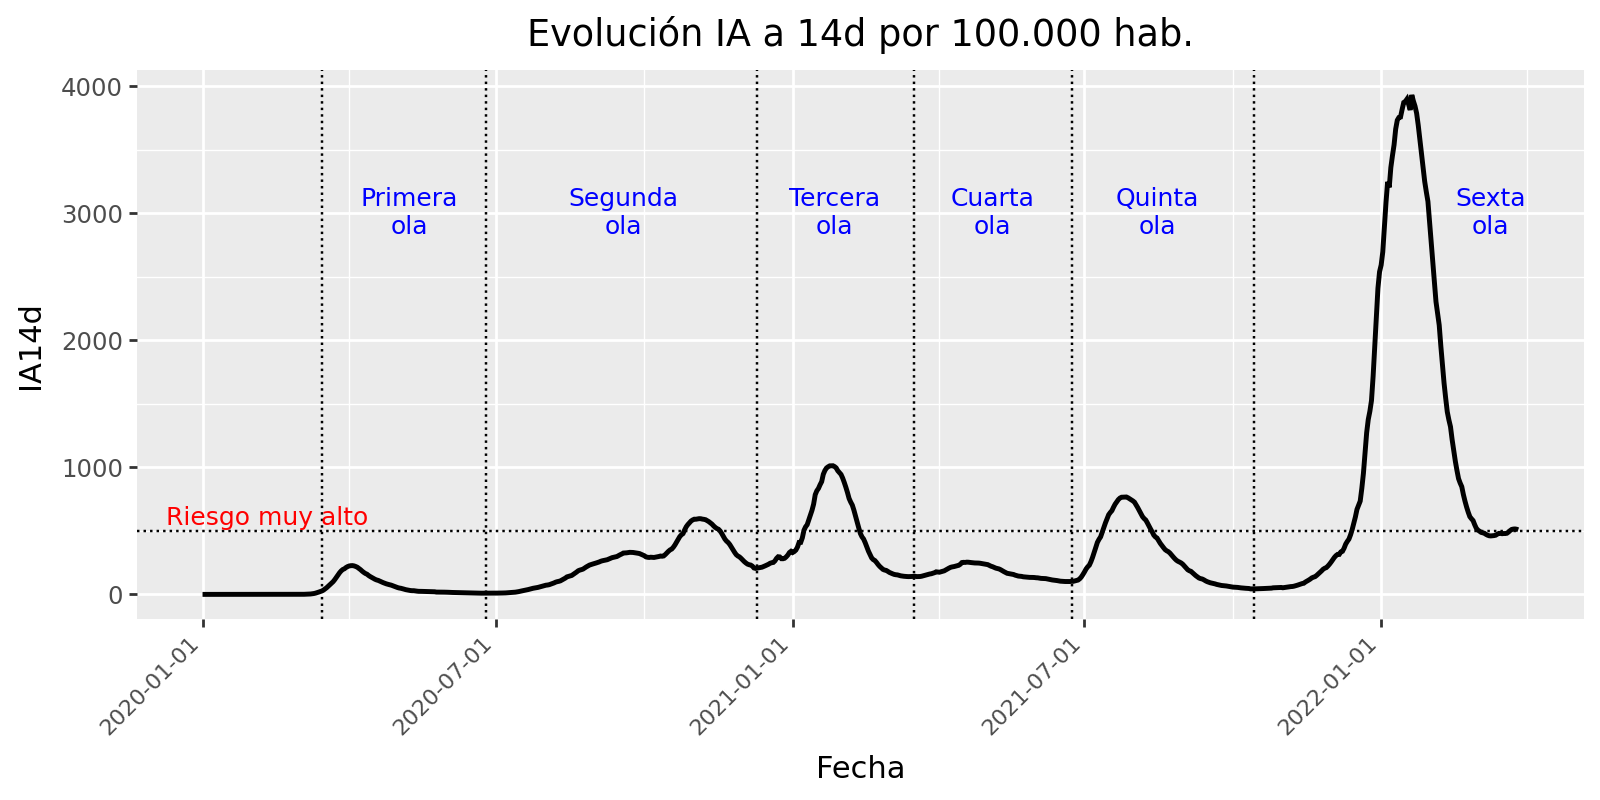

In [358]:
(
    ggplot(casos_trend_pob)                  # Crea el objeto base de plot con el DataFrame 'casos_trend_pob'.
    + aes(x='fecha', y='ia14d')              # Mapea columnas: 'fecha' al eje X y 'ia14d' al eje Y.
    + geom_smooth(method='lowess',           # Añade curva suavizada con LOWESS (tendencia).
                  span=0.0)                  # 'span' controla cuánta suavización hay (0–1).
                                             # ⚠️ 0.0 suele ser inválido o “sin suavizar”; usa p.ej. 0.2–0.5.

    + geom_hline(yintercept=500,             # Línea horizontal a Y=500 (activa).
                 size=0.5, linetype='dotted')

    + geom_vline(xintercept='2020-03-15',    # Línea vertical marcando la fecha indicada.
                 size=0.5, linetype='dotted')
    + geom_vline(xintercept='2020-06-25',
                 size=0.5, linetype='dotted')
    + geom_vline(xintercept='2020-12-10',
                 size=0.5, linetype='dotted')
    + geom_vline(xintercept='2021-03-17',
                 size=0.5, linetype='dotted')
    + geom_vline(xintercept='2021-06-23',
                 size=0.5, linetype='dotted')
    + geom_vline(xintercept='2021-10-14',
                 size=0.5, linetype='dotted')

    + theme(figure_size=(8, 4),              # Ajusta tamaño (ancho=8, alto=4 pulgadas)
            axis_text_x=element_text(        # y el estilo del texto del eje X:
                angle=45,                    # gira etiquetas 45°
                hjust=1,                     # justifica a la derecha (mejor lectura en diagonal)
                size=8))                     # tamaño de fuente 8

    + annotate('text',                       # Escribe texto libre en coordenadas X/Y dadas.
               x='2020-02-10', y=600,
               label='Riesgo muy alto',
               size=9, color='red')
    + annotate('text',
               x='2020-05-08', y=3000,
               label='Primera\nola',         # '\n' inserta un salto de línea dentro del texto.
               size=9, color='blue')
    + annotate('text',
               x='2020-09-18', y=3000,
               label='Segunda\nola',
               size=9, color='blue')
    + annotate('text',
               x='2021-01-27', y=3000,
               label='Tercera\nola',
               size=9, color='blue')
    + annotate('text',
               x='2021-05-05', y=3000,
               label='Cuarta\nola',
               size=9, color='blue')
    + annotate('text',
               x='2021-08-15', y=3000,
               label='Quinta\nola',
               size=9, color='blue')
    + annotate('text',
               x='2022-03-10', y=3000,
               label='Sexta\nola',
               size=9, color='blue')

    + labs(title='Evolución IA a 14d por 100.000 hab.',  # Título y etiquetas de ejes.
           x='Fecha', y='IA14d')
)

Se visualizan picos en determinados momentos de la pendame, que corresponden a las diferentes olas, notándose especialmente de la correspondiente a la sexta ola de la pandemia.

### Población de cada franja estaria para cada provincia

Si anteriormente habíamos hecho el groupby de preparación de datos por fecha y periodo, ahora lo haremos por periodo y franja_etaria.

Esto se debe a que queremos visualziar 

In [359]:
cov_prv.to_pickle('cov_prv.pkl')

In [360]:
cov_prv.head()

,provincia_iso,sexo,franja_etaria,fecha,num_casos,num_hosp,num_uci,num_def,code,postal_code,periodo,semana
0,A,H,0-9,2020-01-01,0,0,0,0,A,3.0,2020,1
1,A,H,10-19,2020-01-01,0,0,0,0,A,3.0,2020,1
2,A,H,20-29,2020-01-01,0,0,0,0,A,3.0,2020,1
3,A,H,30-39,2020-01-01,0,0,0,0,A,3.0,2020,1
4,A,H,40-49,2020-01-01,0,0,0,0,A,3.0,2020,1


In [361]:
cov_prv.describe(include='all')

,provincia_iso,sexo,franja_etaria,fecha,num_casos,num_hosp,num_uci,num_def,code,postal_code,periodo,semana
count,1274520,1299030,1299030,1299030,1.299030e+06,1.299030e+06,1.299030e+06,1.299030e+06,1250010,1.274520e+06,1.299030e+06,1299030.0
unique,52,3,10,NaN,NaN,NaN,NaN,NaN,51,NaN,NaN,<NA>
top,A,H,0-9,NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,<NA>
freq,24510,433010,129903,NaN,NaN,NaN,NaN,NaN,24510,NaN,NaN,<NA>
mean,NaN,NaN,NaN,2021-02-12 00:00:00.000000256,8.916302e+00,4.002325e-01,3.814539e-02,7.993349e-02,NaN,2.650000e+01,2.020657e+03,24.73317
min,NaN,NaN,NaN,2020-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000e+00,2.020000e+03,1.0
25%,NaN,NaN,NaN,2020-07-23 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.375000e+01,2.020000e+03,10.0
50%,NaN,NaN,NaN,2021-02-12 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,2.650000e+01,2.021000e+03,24.0
75%,NaN,NaN,NaN,2021-09-04 00:00:00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,3.925000e+01,2.021000e+03,38.0
max,NaN,NaN,NaN,2022-03-27 00:00:00,3.749000e+03,2.710000e+02,3.500000e+01,1.000000e+02,NaN,5.200000e+01,2.022000e+03,53.0


In [362]:
casos_franja_periodo = cov_prv.groupby(['periodo',
                                        'franja_etaria',
                                        'provincia_iso']).agg({'num_casos':'sum',
                                                               'num_hosp':'sum', 
                                                               'num_uci':'sum', 
                                                               'num_def':'sum'}).reset_index()

In [363]:
casos_franja_periodo.head()

,periodo,franja_etaria,provincia_iso,num_casos,num_hosp,num_uci,num_def
0,2020,0-9,A,3620,46,2,0
1,2020,0-9,AB,929,20,4,1
2,2020,0-9,AL,1815,21,2,0
3,2020,0-9,AV,369,3,0,0
4,2020,0-9,B,15477,77,1,0


Hacemos un merge para incorporar a nuestros datos de covid, ya arupados, los adtos de población por provincia y periodo

In [364]:
casos_trend_pob.to_pickle('casos_trend_poblacion.pkl')

In [365]:
poblacion.head()

,periodo,provincia,postal_code,franja_etaria,total,code,name,phone_code,iso2
0,2020,01 Araba/Álava,1,0-9,31709.299340,VI,Álava,945,ES
1,2020,01 Araba/Álava,1,10-19,32961.976182,VI,Álava,945,ES
2,2020,01 Araba/Álava,1,20-29,29243.296939,VI,Álava,945,ES
3,2020,01 Araba/Álava,1,30-39,38658.627289,VI,Álava,945,ES
4,2020,01 Araba/Álava,1,40-49,54453.120853,VI,Álava,945,ES


In [366]:
poblacion.to_pickle('poblacion_3_años.pkl')

In [367]:
casos_franja_periodo = casos_franja_periodo.merge(poblacion,
                                                  how='left',
                                                  left_on=['periodo',
                                                        'franja_etaria',
                                                        'provincia_iso'],
                                                    right_on=['periodo',
                                                            'franja_etaria',
                                                            'code'])

In [368]:
casos_franja_periodo.rename(columns={'total':'poblacion'},inplace=True)

In [369]:
casos_franja_periodo.head()

,periodo,franja_etaria,provincia_iso,num_casos,num_hosp,num_uci,num_def,provincia,postal_code,poblacion,code,name,phone_code,iso2
0,2020,0-9,A,3620,46,2,0,03 Alicante/Alacant,3.0,168506.146511,A,Alacant,950.0,ES
1,2020,0-9,AB,929,20,4,1,02 Albacete,2.0,34689.677644,AB,Albacete,967.0,ES
2,2020,0-9,AL,1815,21,2,0,04 Almería,4.0,79321.627465,AL,Almería,920.0,ES
3,2020,0-9,AV,369,3,0,0,05 Ávila,5.0,11841.897665,AV,Ávila,924.0,ES
4,2020,0-9,B,15477,77,1,0,08 Barcelona,8.0,532994.962320,B,Barcelona,93.0,ES


Eliminamos NC y calculamos ratios de incidencia etc. por población para cada provincia y franaj etaria

In [370]:
casos_franja_periodo = casos_franja_periodo[casos_franja_periodo['franja_etaria']!='NC']
casos_franja_periodo['casos_x_cienmil'] = casos_franja_periodo['num_casos']/casos_franja_periodo['poblacion'] * 100000
casos_franja_periodo['hosp_x_cienmil'] = casos_franja_periodo['num_hosp']/casos_franja_periodo['poblacion'] * 100000
casos_franja_periodo['uci_x_cienmil'] = casos_franja_periodo['num_uci']/casos_franja_periodo['poblacion'] * 100000
casos_franja_periodo['def_x_cienmil'] = casos_franja_periodo['num_def']/casos_franja_periodo['poblacion'] * 100000

In [371]:
casos_franja_periodo = casos_franja_periodo.dropna(how='all').reset_index(drop=True)

In [372]:
casos_franja_periodo

,periodo,franja_etaria,provincia_iso,num_casos,num_hosp,num_uci,num_def,provincia,postal_code,poblacion,code,name,phone_code,iso2,casos_x_cienmil,hosp_x_cienmil,uci_x_cienmil,def_x_cienmil
0,2020,0-9,A,3620,46,2,0,03 Alicante/Alacant,3.0,168506.146511,A,Alacant,950.0,ES,2148.289588,27.298707,1.186900,0.000000
1,2020,0-9,AB,929,20,4,1,02 Albacete,2.0,34689.677644,AB,Albacete,967.0,ES,2678.030074,57.654038,11.530808,2.882702
2,2020,0-9,AL,1815,21,2,0,04 Almería,4.0,79321.627465,AL,Almería,920.0,ES,2288.152750,26.474495,2.521380,0.000000
3,2020,0-9,AV,369,3,0,0,05 Ávila,5.0,11841.897665,AV,Ávila,924.0,ES,3116.054626,25.333777,0.000000,0.000000
4,2020,0-9,B,15477,77,1,0,08 Barcelona,8.0,532994.962320,B,Barcelona,93.0,ES,2903.779790,14.446666,0.187619,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,2022,80+,V,11150,1182,10,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1400,2022,80+,VA,3060,405,7,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1401,2022,80+,VI,2077,158,1,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1402,2022,80+,Z,6105,853,57,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [373]:
casos_franja_periodo['periodo'] = casos_franja_periodo['periodo'].astype({'periodo':'str'})

In [374]:
casos_franja_periodo.describe(include='all')

,periodo,franja_etaria,provincia_iso,num_casos,num_hosp,num_uci,num_def,provincia,postal_code,poblacion,code,name,phone_code,iso2,casos_x_cienmil,hosp_x_cienmil,uci_x_cienmil,def_x_cienmil
count,1404,1404,1404,1404.000000,1404.000000,1404.000000,1404.000000,1071,1071.000000,1.071000e+03,1071,1071,1071.000000,1071,1071.000000,1071.000000,1071.000000,1071.000000
unique,3,9,52,NaN,NaN,NaN,NaN,51,NaN,NaN,51,51,NaN,1,NaN,NaN,NaN,NaN
top,2020,0-9,A,NaN,NaN,NaN,NaN,03 Alicante/Alacant,NaN,NaN,A,Alacant,NaN,ES,NaN,NaN,NaN,NaN
freq,468,156,27,NaN,NaN,NaN,NaN,21,NaN,NaN,21,21,NaN,1071,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,8078.304131,363.532764,34.597578,72.727920,NaN,26.411765,1.076899e+05,NaN,NaN,821.235294,NaN,8854.014919,240.996349,28.791337,30.140790
std,NaN,NaN,NaN,15041.925762,1023.386710,101.913725,320.987968,NaN,15.148468,1.499245e+05,NaN,NaN,314.197582,NaN,5219.606450,337.181362,49.324524,82.459151
min,NaN,NaN,NaN,89.000000,0.000000,0.000000,0.000000,NaN,1.000000,3.809396e+03,NaN,NaN,91.000000,NaN,806.317010,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,1898.500000,31.000000,2.000000,0.000000,NaN,13.000000,3.148294e+04,NaN,NaN,924.000000,NaN,4556.888507,46.945226,1.719803,0.000000
50%,NaN,NaN,NaN,3686.000000,113.500000,6.000000,4.000000,NaN,26.000000,6.693398e+04,NaN,NaN,953.000000,NaN,7525.343352,105.316988,8.289039,1.479704
75%,NaN,NaN,NaN,8040.750000,351.000000,30.000000,38.000000,NaN,40.000000,1.169387e+05,NaN,NaN,974.000000,NaN,12776.893215,290.292289,29.491838,11.992832


### Heatmap (seaborn) de incidencia por provincia y por franja de edad

Es importante señalar que ahora tenemos los datos ya proporcionales a población -franja etaria - provincia - año(2020,2021,2022) y además para cada indicador: casos, hosp, uci, def. 

A continuación eligiremos un año

In [375]:
casos_2020 = casos_franja_periodo.loc[(casos_franja_periodo['franja_etaria'] != 'NC') & (casos_franja_periodo['periodo'] == '2020')]

In [376]:
casos_2020

,periodo,franja_etaria,provincia_iso,num_casos,num_hosp,num_uci,num_def,provincia,postal_code,poblacion,code,name,phone_code,iso2,casos_x_cienmil,hosp_x_cienmil,uci_x_cienmil,def_x_cienmil
0,2020,0-9,A,3620,46,2,0,03 Alicante/Alacant,3.0,168506.146511,A,Alacant,950.0,ES,2148.289588,27.298707,1.186900,0.000000
1,2020,0-9,AB,929,20,4,1,02 Albacete,2.0,34689.677644,AB,Albacete,967.0,ES,2678.030074,57.654038,11.530808,2.882702
2,2020,0-9,AL,1815,21,2,0,04 Almería,4.0,79321.627465,AL,Almería,920.0,ES,2288.152750,26.474495,2.521380,0.000000
3,2020,0-9,AV,369,3,0,0,05 Ávila,5.0,11841.897665,AV,Ávila,924.0,ES,3116.054626,25.333777,0.000000,0.000000
4,2020,0-9,B,15477,77,1,0,08 Barcelona,8.0,532994.962320,B,Barcelona,93.0,ES,2903.779790,14.446666,0.187619,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2020,80+,V,6511,2649,57,1076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464,2020,80+,VA,3995,1402,22,862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
465,2020,80+,VI,1549,579,9,363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,2020,80+,Z,5769,2503,122,1343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Y hacemos un pivot para pareparar nuestros datos eligiendo únicamente el idnciador de núm. (proporcional) de casos

In [377]:
casos_2020_sin_dups = casos_2020.drop_duplicates(subset=['name', 'franja_etaria'])
casos_2020_heatmap = casos_2020_sin_dups.pivot(
    index='name', columns='franja_etaria', values='casos_x_cienmil'
)

In [378]:
casos_2020_heatmap2 = casos_2020_heatmap.dropna(how='all')

In [379]:
casos_2020_heatmap2

franja_etaria,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
name,,,,,,,,,
A Coruña,1702.041046,2041.408395,3131.178582,2730.228444,2323.631272,2296.231486,NaN,1997.415470,NaN
Alacant,2148.289588,3043.569583,3991.890795,3351.654351,3107.301481,3022.367099,NaN,2434.566861,NaN
Albacete,2678.030074,3901.835923,4560.948663,4367.818273,4444.607647,4650.208707,NaN,4128.302738,NaN
Almería,2288.152750,3251.075487,4227.022953,3630.468219,3167.376899,2813.084529,NaN,1808.564952,NaN
Asturias,1641.795962,2625.177955,3177.053581,2686.381896,2626.677790,2654.670306,NaN,2224.969551,NaN
Badajoz,2433.181102,3472.433360,4356.811603,3696.697426,3438.321455,3384.564303,NaN,2764.894013,NaN
Barcelona,2903.779790,4864.871268,5783.325573,5086.199455,4785.614832,4733.378765,NaN,3903.658347,NaN
Bizkaia,3715.529929,5252.765180,7037.204517,5913.595391,5222.074395,4959.981072,NaN,3356.890679,NaN
Burgos,5462.643933,7109.840218,8072.473201,6652.476968,6341.634250,6536.087177,NaN,4826.225434,NaN


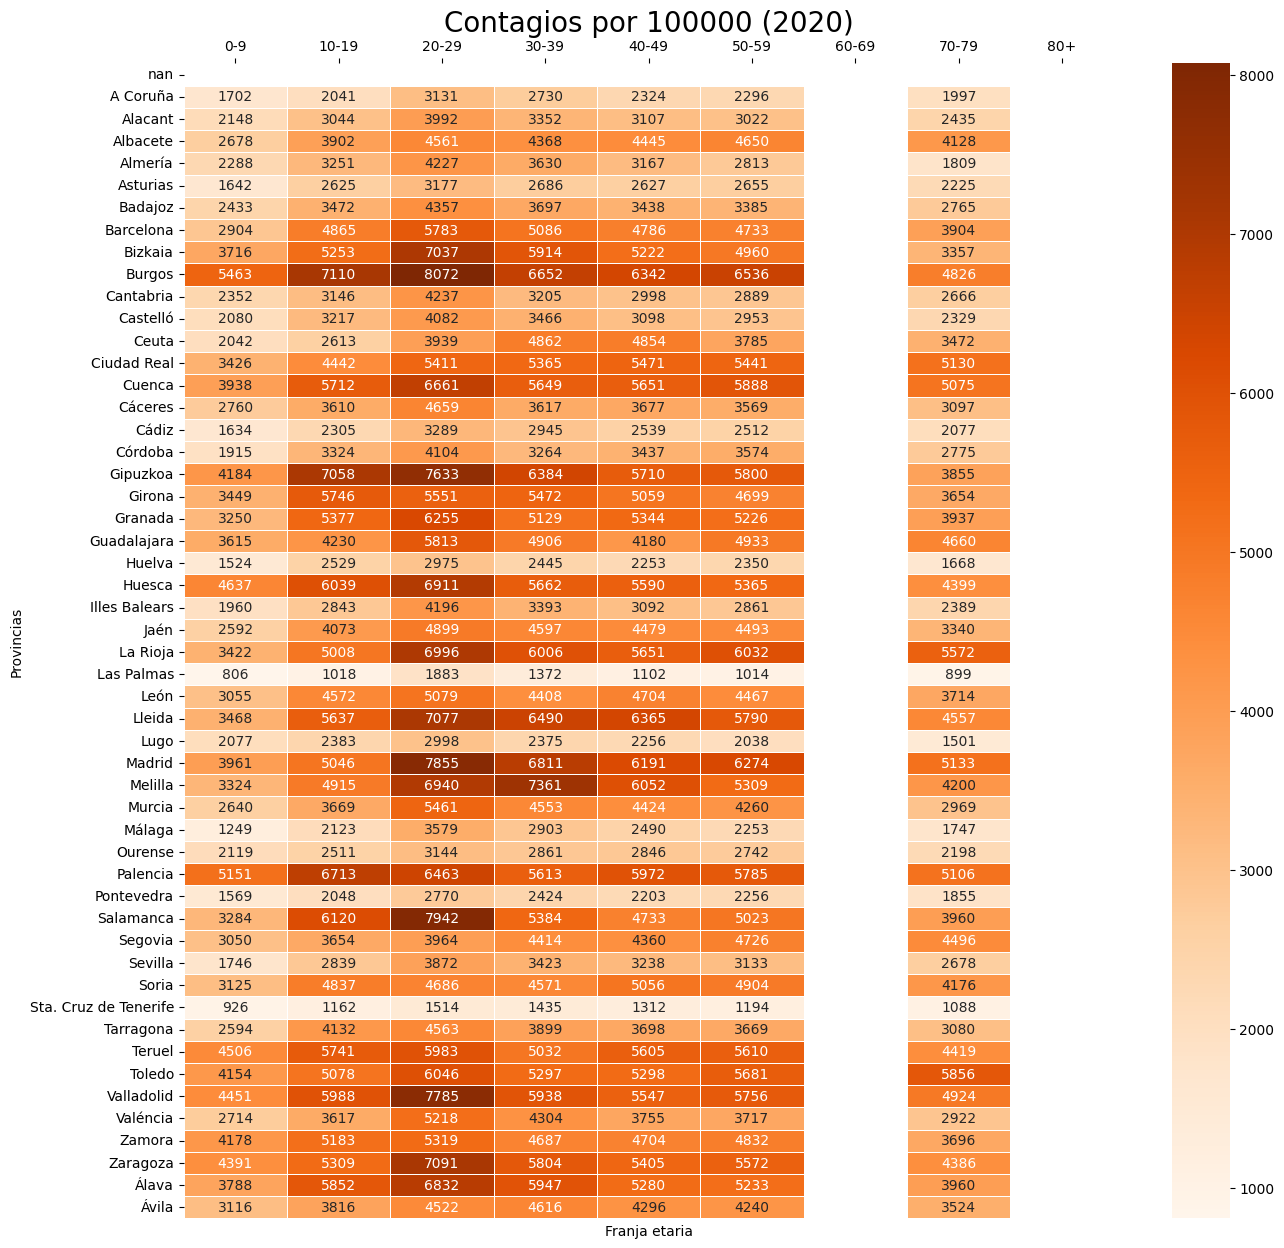

In [380]:
fig, ax = plt.subplots(figsize=(15,15))        
ax = sns.heatmap(casos_2020_heatmap
                , cmap = 'Oranges'
                , annot=True
                , linewidth=.5
                 , fmt = '.0f'
                )
ax.xaxis.tick_top()
ax.set_title('Contagios por 100000 (2020)', fontsize =20)
plt.xlabel('Franja etaria') 
plt.ylabel('Provincias') 
plt.show()

In [381]:
imagen = ax.get_figure()
imagen.savefig("heatmap_contagios_2020.png",  dpi=300) # Guardamos el mapa como imagen png 

Vemos las diferencias por UCI

In [382]:
uci_2020_heatmap = casos_2020_sin_dups.pivot(
    index='name', columns='franja_etaria', values='uci_x_cienmil'
)

In [383]:
uci_2020_heatmap2 = uci_2020_heatmap.dropna(how='all')

In [384]:
uci_2020_heatmap

franja_etaria,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
name,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Coruña,0.000000,1.044199,1.057116,8.337733,16.532607,39.842751,NaN,136.319658,NaN
Alacant,1.186900,0.505241,2.101548,8.448839,24.894622,48.570592,NaN,129.651490,NaN
Albacete,11.530808,2.449363,0.000000,14.374578,57.065762,123.064803,NaN,206.900059,NaN
Almería,2.521380,0.000000,11.910462,12.831998,23.840471,52.646003,NaN,100.933579,NaN
Asturias,0.000000,0.000000,3.783708,7.192455,16.240050,44.336874,NaN,114.959777,NaN
Badajoz,0.000000,0.000000,1.346357,8.201864,11.802019,39.255201,NaN,114.979348,NaN
Barcelona,0.187619,0.818699,3.438947,11.604758,22.052547,59.397983,NaN,113.171058,NaN
Bizkaia,1.055548,1.831189,3.957376,16.644619,27.951910,52.457046,NaN,136.870841,NaN


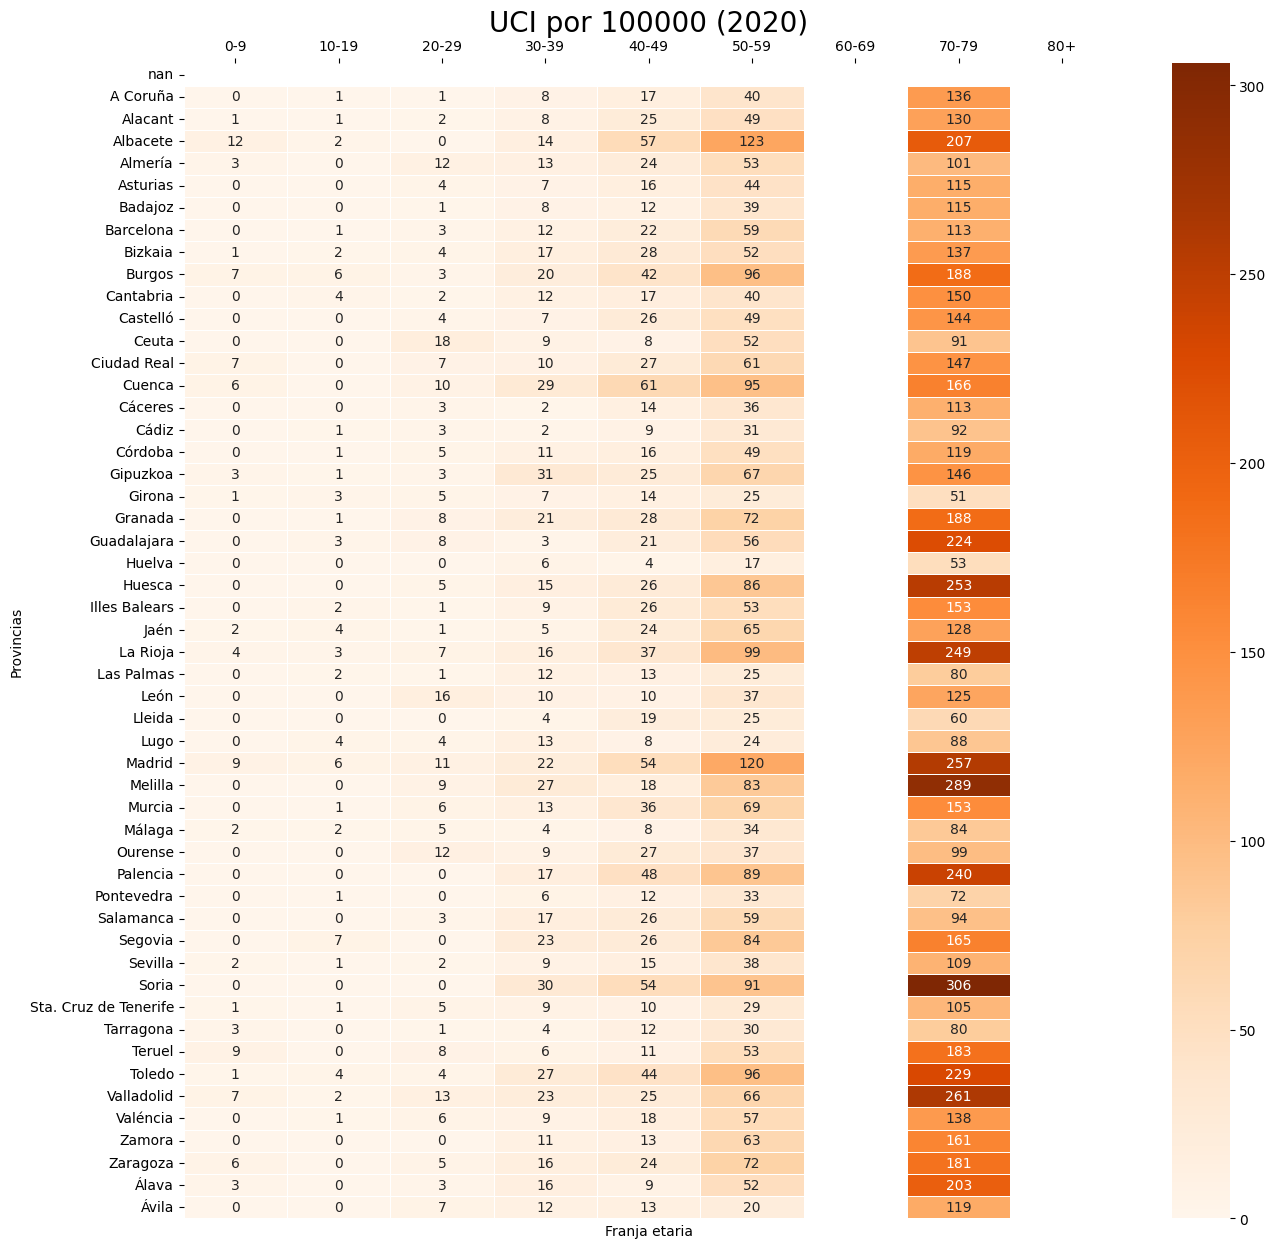

In [385]:
fig, ax = plt.subplots(figsize=(15,15))        
ax = sns.heatmap(uci_2020_heatmap
                , cmap = 'Oranges'
                , annot=True
                , linewidth=.5
                 , fmt = '.0f'
                )
ax.xaxis.tick_top()
ax.set_title('UCI por 100000 (2020)', fontsize =20)
plt.xlabel('Franja etaria') 
plt.ylabel('Provincias') 
plt.show()

Lo mismo para 2021

In [386]:
casos_2021 = casos_franja_periodo.loc[(casos_franja_periodo['franja_etaria'] != 'NC') & (casos_franja_periodo['periodo'] == '2021')]

In [387]:
casos_2021.head()

,periodo,franja_etaria,provincia_iso,num_casos,num_hosp,num_uci,num_def,provincia,postal_code,poblacion,code,name,phone_code,iso2,casos_x_cienmil,hosp_x_cienmil,uci_x_cienmil,def_x_cienmil
468,2021,0-9,A,16362,90,2,0,03 Alicante/Alacant,3.0,164557.514685,A,Alacant,950.0,ES,9943.028145,54.692124,1.215381,0.000000
469,2021,0-9,AB,2919,19,4,0,02 Albacete,2.0,33535.250934,AB,Albacete,967.0,ES,8704.273619,56.656800,11.927747,0.000000
470,2021,0-9,AL,6603,41,2,1,04 Almería,4.0,78149.658037,AL,Almería,920.0,ES,8449.173248,52.463441,2.559192,1.279596
471,2021,0-9,AV,1174,5,1,0,05 Ávila,5.0,11539.305952,AV,Ávila,924.0,ES,10173.922114,43.330162,8.666032,0.000000
472,2021,0-9,B,53408,99,4,1,08 Barcelona,8.0,513375.991688,B,Barcelona,93.0,ES,10403.291323,19.284112,0.779156,0.194789


In [388]:
casos_2021_sin_dups = casos_2021.drop_duplicates(subset=['name', 'franja_etaria'])
casos_2021_heatmap = casos_2021_sin_dups.pivot(
    index='name', columns='franja_etaria', values='casos_x_cienmil'
)

In [389]:
casos_2021_heatmap2 = casos_2021_heatmap.dropna(how='all')

In [390]:
casos_2021_heatmap2

franja_etaria,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
name,,,,,,,,,
A Coruña,8087.854474,12286.605142,16066.513880,9831.874865,7611.911074,5681.727212,NaN,3230.307547,NaN
Alacant,9943.028145,12942.089845,15667.777177,11858.682483,10153.443508,8767.957999,NaN,5305.619171,NaN
Albacete,8704.273619,12074.297399,13898.809338,10581.770068,9204.432997,7843.769283,NaN,4399.633354,NaN
Almería,8449.173248,11724.456570,12692.689073,9945.420702,8727.623451,7401.228124,NaN,4737.400938,NaN
Asturias,8362.843957,11432.946581,14312.373858,9613.314131,7816.702880,6144.609198,NaN,3485.775737,NaN
Badajoz,10310.440575,13691.370639,16278.021414,12056.878152,10271.533827,8533.942269,NaN,5102.542032,NaN
Barcelona,10403.291323,15725.318073,18608.953830,15264.462031,12499.948243,10081.899299,NaN,5760.826576,NaN
Bizkaia,14374.739882,17893.352439,21052.053935,15591.710788,13149.352014,10523.861235,NaN,4833.961768,NaN
Burgos,11806.564010,16950.282563,20447.828661,14849.324379,11977.726747,9800.072977,NaN,5412.088115,NaN


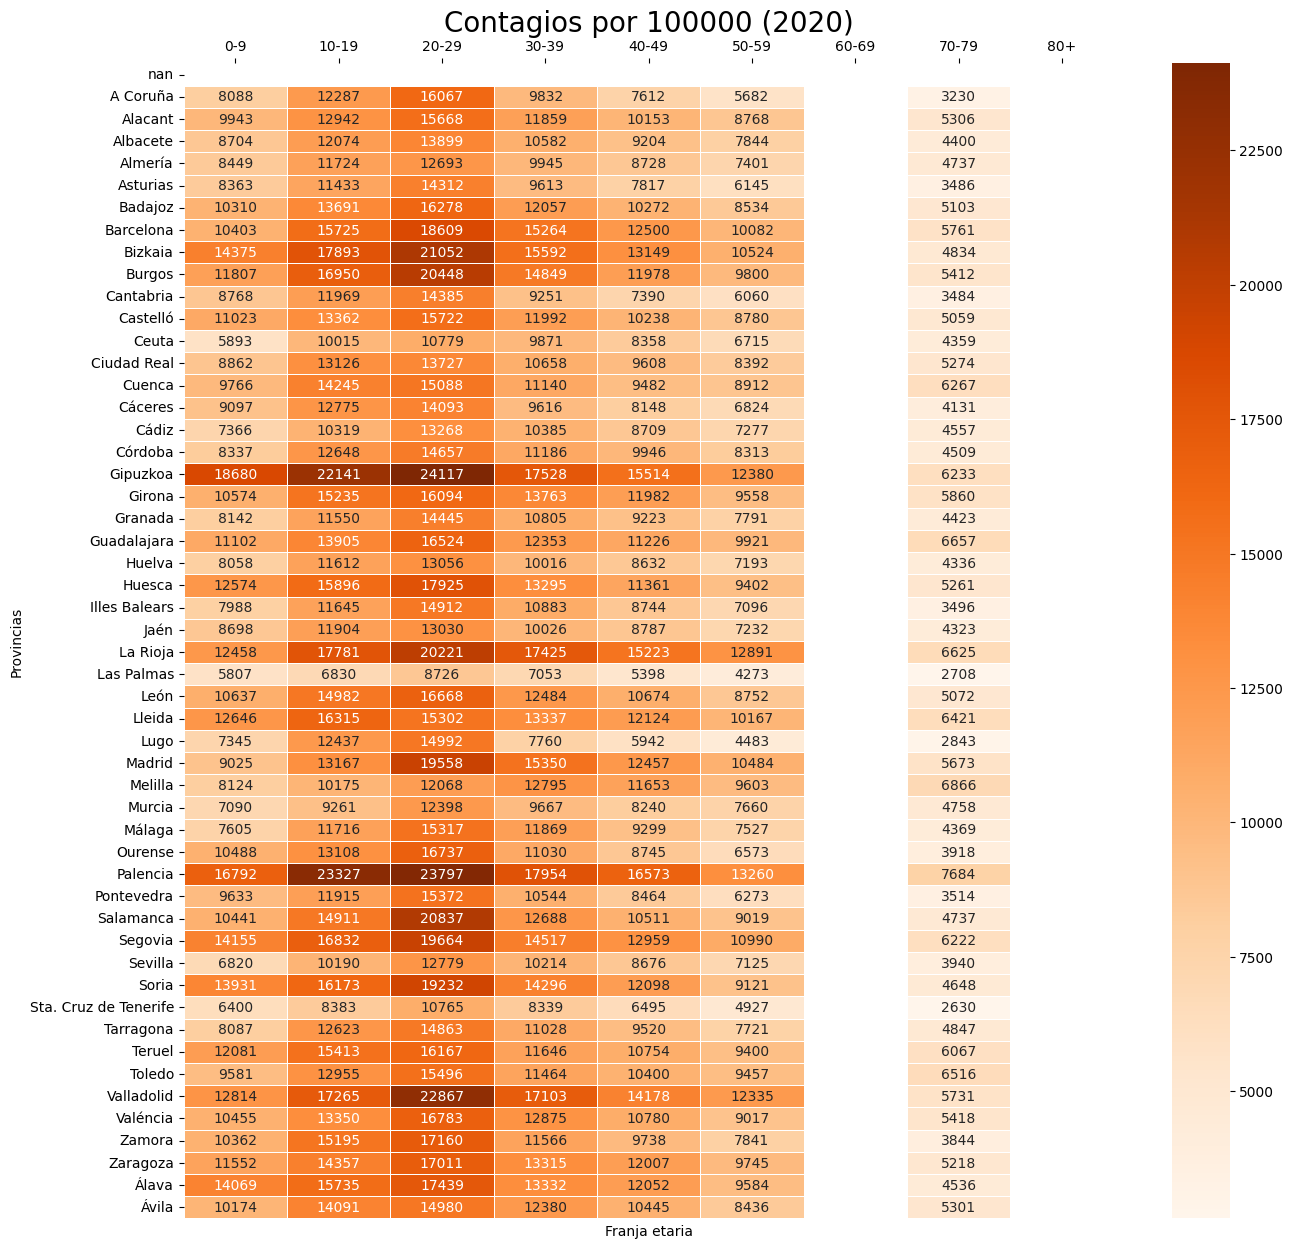

In [391]:
fig, ax = plt.subplots(figsize=(15,15))        
ax = sns.heatmap(casos_2021_heatmap
                , cmap = 'Oranges'
                , annot=True
                , linewidth=.5
                 , fmt = '.0f'
                )
ax.xaxis.tick_top()
ax.set_title('Contagios por 100000 (2020)', fontsize =20)
plt.xlabel('Franja etaria') 
plt.ylabel('Provincias') 
plt.show()

In [392]:
imagen = ax.get_figure()
imagen.savefig("heatmap_contagios_2021.png",  dpi=300) # Guardamos el mapa como imagen png 

Lo mismo para 2022

In [393]:
casos_2022 = casos_franja_periodo.loc[(casos_franja_periodo['franja_etaria'] != 'NC') & (casos_franja_periodo['periodo'] == '2022')]

In [394]:
casos_2022_sin_dups = casos_2022.drop_duplicates(subset=['name', 'franja_etaria'])
casos_2022_heatmap = casos_2022_sin_dups.pivot(
    index='name', columns='franja_etaria', values='casos_x_cienmil'
)

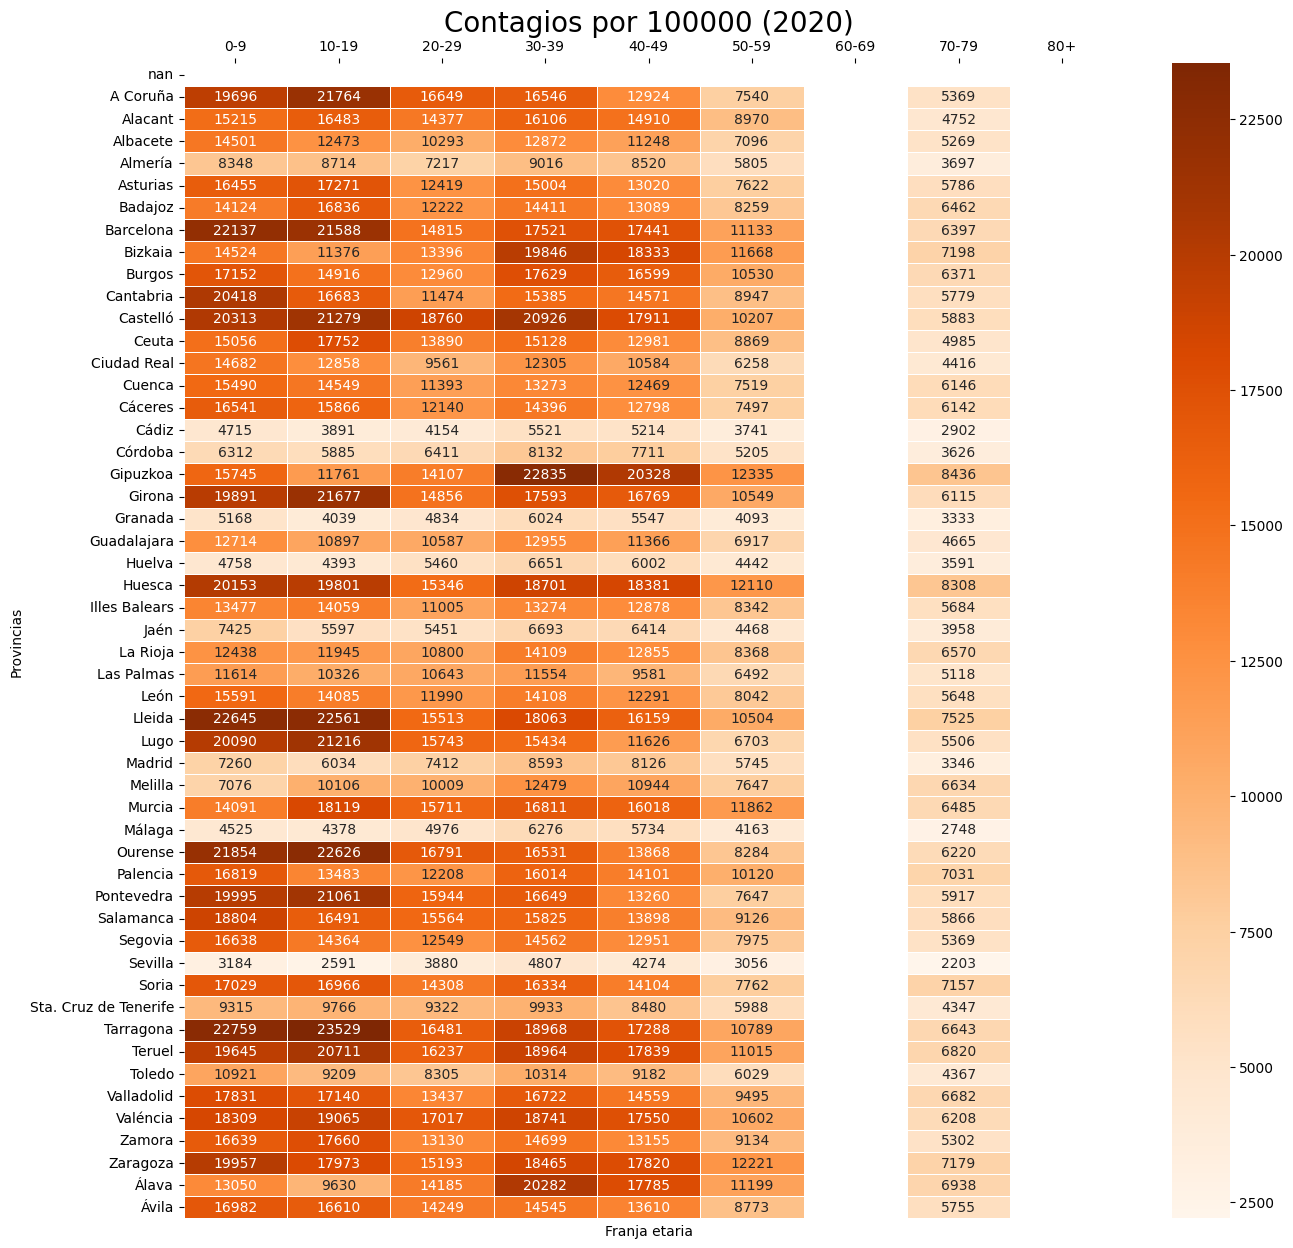

In [395]:
fig, ax = plt.subplots(figsize=(15,15))        
ax = sns.heatmap(casos_2022_heatmap
                , cmap = 'Oranges'
                , annot=True
                , linewidth=.5
                 , fmt = '.0f'
                )
ax.xaxis.tick_top()
ax.set_title('Contagios por 100000 (2020)', fontsize =20)
plt.xlabel('Franja etaria') 
plt.ylabel('Provincias') 
plt.show()

In [396]:
imagen = ax.get_figure()
imagen.savefig("heatmap_contagios_2022.png",  dpi=300) # Guardamos el mapa como imagen png 